# Import Modules

In [1]:
import pandas as pd
import numpy as np

import utils

# Load Data

In [2]:
target_vegetable = "トマト"
train_size = 4000

In [3]:
train = pd.read_csv("./data/train.csv")
train["date"] = pd.to_datetime(train["date"], format="%Y%m%d")

train["year"] = train.date.dt.year
years = pd.get_dummies(train["year"])
train = train.drop(columns="year")
train = pd.concat([train, years], axis=1)

train["month"] = train.date.dt.month
months = pd.get_dummies(train["month"])
train = train.drop(columns="month")
train = pd.concat([train, months], axis=1)

train["weekday"] = train.date.dt.weekday
weekdays = pd.get_dummies(train["weekday"])
train = train.drop(columns="weekday")
train = pd.concat([train, weekdays], axis=1)

areas = pd.get_dummies(train["area"])
train = train.drop(columns="area")
train = pd.concat([train, areas], axis=1)

target_values = utils.get_target_values(train, target_vegetable)
train_x, train_y, test_y, train, test, ss = utils.preprocess_data(target_values, train_size=train_size, T=10)

# Training

In [4]:
future = target_values.shape[0] - train_size
pred_y, _ = utils.pipeline_rnn(train_x, train_y, train, test, test_y, future=future, num_epochs=200)

training loss = 1.01655113697052
test loss = 0.8922500610351562
training loss = 0.5305261611938477
test loss = 1.622922420501709
training loss = 0.20436283946037292
test loss = 0.866482675075531
training loss = 0.16965605318546295
test loss = 0.5183741450309753
training loss = 0.15936903655529022
test loss = 0.5818740725517273
training loss = 0.15614132583141327
test loss = 0.6130989789962769
training loss = 0.1508578509092331
test loss = 0.7083436846733093
training loss = 0.153206467628479
test loss = 0.49522629380226135
training loss = 0.15466468036174774
test loss = 0.5789312124252319
training loss = 0.14227405190467834
test loss = 0.49391254782676697
training loss = 0.148926243185997
test loss = 0.6151551604270935
training loss = 0.14818839728832245
test loss = 0.5043924450874329
training loss = 0.14698749780654907
test loss = 0.5031729340553284
training loss = 0.14533716440200806
test loss = 0.41029441356658936
training loss = 0.13958388566970825
test loss = 0.43579378724098206
tr

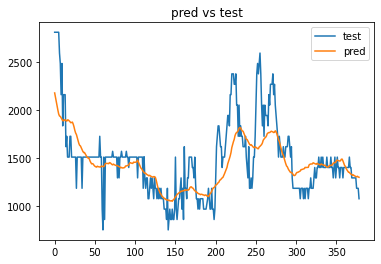

In [5]:
pred_y = pred_y.detach().numpy()
pred = np.concatenate([pred_y.reshape(-1, 1), test[:, 1:]], axis=1)

utils.plot_prediction(pred, test, ss)

# Terminal Score

In [ ]:
utils.get_terminal_score()